# Multiclass Classification

## Import Necessary Libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
root_path = Path(".").absolute()
data_path = root_path / "data"
data_path.mkdir(exist_ok=True)

%matplotlib inline

## About the dataset

<p>The dataset being used for this lab is the "Obesity Risk Prediction" publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The dataset has 17 attributes in total along with 2,111 samples.</p>
<p>The attributes of the dataset are described below.</p>

<table style="border-collapse: collapse; border: 1px solid; text-align: center;">
    <thead>
    <tr>
        <th style="border: 1px solid; text-align: left;">Variable Name</th>
        <th style="border: 1px solid; text-align: left;">Type</th>
        <th style="border: 1px solid; text-align: left;">Description</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="border: 1px solid; text-align: left;">Gender</td>
        <td style="border: 1px solid; text-align: left;">Categorical</td>
        <td style="border: 1px solid; text-align: left;">-</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">Age</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">-</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">Height</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">-</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">Weight</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">-</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">family_history_with_overweight</td>
        <td style="border: 1px solid; text-align: left;">Binary</td>
        <td style="border: 1px solid; text-align: left;">Has a family member suffered or suffers from overweight?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">FAVC</td>
        <td style="border: 1px solid; text-align: left;">Binary</td>
        <td style="border: 1px solid; text-align: left;">Do you eat high caloric food frequently?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">FCVC</td>
        <td style="border: 1px solid; text-align: left;">Integer</td>
        <td style="border: 1px solid; text-align: left;">Do you usually eat vegetables in your meals?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">NCP</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">How many main meals do you have daily?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">CAEC</td>
        <td style="border: 1px solid; text-align: left;">Categorical</td>
        <td style="border: 1px solid; text-align: left;">Do you eat any food between meals?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">SMOKE</td>
        <td style="border: 1px solid; text-align: left;">Binary</td>
        <td style="border: 1px solid; text-align: left;">Do you smoke?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">CH2O</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">How much water do you drink daily?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">SCC</td>
        <td style="border: 1px solid; text-align: left;">Binary</td>
        <td style="border: 1px solid; text-align: left;">Do you monitor the calories you eat daily?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">FAF</td>
        <td style="border: 1px solid; text-align: left;">Continuous</td>
        <td style="border: 1px solid; text-align: left;">How often do you have physical activity?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">TUE</td>
        <td style="border: 1px solid; text-align: left;">Integer</td>
        <td style="border: 1px solid; text-align: left;"></td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">CALC</td>
        <td style="border: 1px solid; text-align: left;">Categorical</td>
        <td style="border: 1px solid; text-align: left;">How often do you drink alcohol?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">MTRANS</td>
        <td style="border: 1px solid; text-align: left;">Categorical</td>
        <td style="border: 1px solid; text-align: left;">Which transportation do you usually use?</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">NObeyesdad</td>
        <td style="border: 1px solid; text-align: left;">Categorical</td>
        <td style="border: 1px solid; text-align: left;">Obesity level</td>
    </tr>
    </tbody>
</table>

## Load the dataset

In [3]:
# url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"

file = data_path / "Obesity_level_prediction_dataset.csv"
df = pd.read_csv(file)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis

<p>Visualize the distribution of the target variable to understand the class balance.</p>

Text(0.5, 1.0, 'Distribution of Obesity Levels')

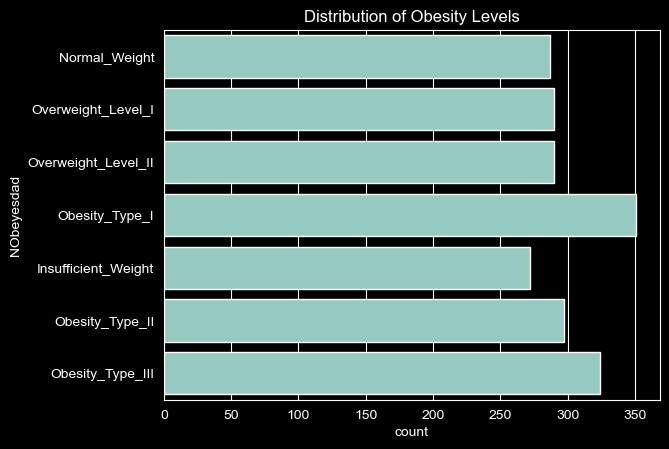

In [4]:
sns.countplot(y="NObeyesdad", data=df)
plt.title("Distribution of Obesity Levels")

<p>This shows that the dataset is fairly balanced and does not require any special attention in terms of biased training.</p>

### Exercise

<p>Check for null values and display a summary of the dataset (use <code>info()</code> and <code>describe()</code> methods).</p>

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Preprocessing the data

### Feature scaling

<p>Scale the numerical features to standardize their ranges for better model performance.</p>

In [8]:
# Standardizing continuous numerical features
continuous_columns = df.select_dtypes(include=["float64"]).columns.tolist()

scaler = StandardScaler()
scaled_features: np.ndarray = scaler.fit_transform(df.loc[:, continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([df.drop(columns=continuous_columns), scaled_df], axis=1)

<p>Standardization of data is important to better define the decision boundaries between classes by making sure that the feature variations are in similar scales. The data is now ready to be used for training and testing.</p>

### One-hot encoding

<p>Convert categorical variables into numerical format using one-hot encoding.</p>

In [9]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns.remove("NObeyesdad")

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features: np.ndarray = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

<p>You will observe that all the categorical variables have now been modified to one-hot encoded features. This increases the overall number of fields to 24.</p>

### Encode the target variable

In [10]:
prepped_data["NObeyesdad"] = prepped_data["NObeyesdad"].astype("category").cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Separate the input and target data

In [11]:
X = prepped_data.drop("NObeyesdad", axis=1)
y = prepped_data["NObeyesdad"]

## Model training and evaluation

### Splitting the dataset

In [12]:
split_data: list[pd.DataFrame] = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = split_data

### Logistic Regression with One-vs-All (OvA)

<p>In the One-vs-All approach:</p>
<ul>
    <li>The algorithm trains a single binary classifier for each class.</li>
    <li>Each classifier learns to distinguish a single class from all the others combined.</li>
    <li>If there are k classes, k classifiers are trained.</li>
    <li>During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.</li>
</ul>
<p>Advantages:</p>
<ul>
    <li>Simpler and more efficient in terms of the number of classifiers (k).</li>
    <li>Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).</li>
</ul>
<p>Disadvantages:</p>
<ul>
    <li>Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.</li>
    <li>Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.</li>
</ul>

<p>Train a logistic regression model using the One-vs-All strategy and evaluate its performance.</p>

In [13]:
# [Deprecated Usage]
# model_ova = LogisticRegression(multi_class="ovr", max_iter=1000)

# Recommended Usage
model_ova = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_ova.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


<p>You can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.</p>

In [14]:
y_pred_ova = model_ova.predict(X_test)
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ova), 2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic Regression with One-vs-One (OvO)

<p>In the One-vs-One approach:</p>
<ul>
    <li>The algorithm trains a binary classifier for every pair of classes in the dataset.</li>
    <li>If there are k classes, this results in $\frac{k(k-1)}{2}$ classifiers.</li>
    <li>Each classifier is trained to distinguish between two specific classes, ignoring the rest.</li>
    <li>During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.</li>
</ul>
<p>Advantages:</p>
<ul>
    <li>Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes)</li>
    <li>Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.</li>
</ul>
<p>Disadvantages:</p>
<ul>
    <li>Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.</li>
    <li>May lead to ambiguous predictions if voting results in a tie.</li>
</ul>

<p>Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.</p>

In [15]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


<p>Evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.</p>

In [16]:
y_pred_ovo = model_ovo.predict(X_test)
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ovo), 2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


### Exercises

<p>1. Experiment with different test sizes in the <code>train_test_split()</code> method (e.g. 0.1, 0.3) and observe the impact on model performance.</p>

In [17]:
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Test Size: 0.1
Accuracy: 0.7594339622641509
Test Size: 0.3
Accuracy: 0.749211356466877


<p>2. Plot a bar chart of feature importance using the coefficients from the One-vs-All logistic regression model. Also try for One-vs-One model.</p>

Text(0.5, 0, 'Importance')

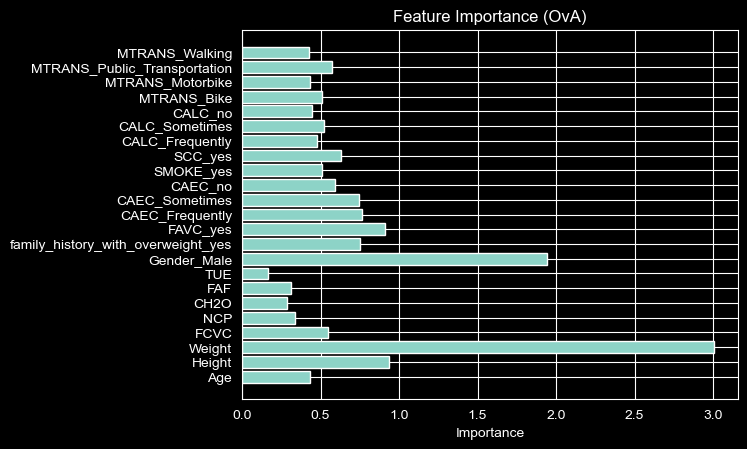

In [18]:
# OvA
coef_ova = np.array([est.coef_[0] for est in model_ova.estimators_])
feature_importance = np.mean(np.abs(coef_ova), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (OvA)")
plt.xlabel("Importance")

Text(0.5, 0, 'Importance')

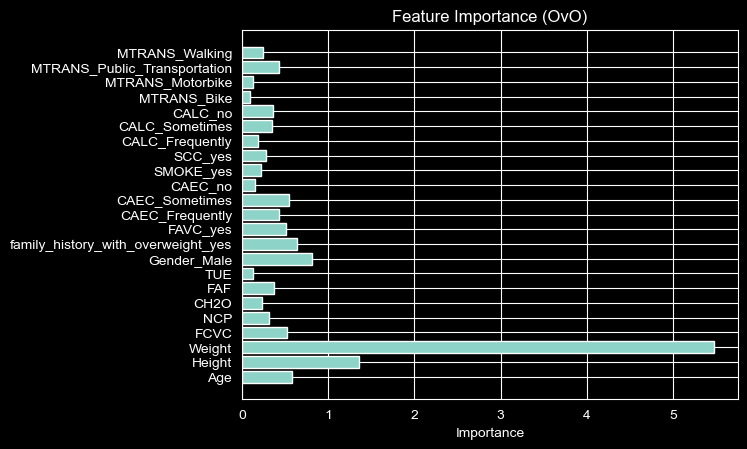

In [19]:
# OvO
coef_ovo = np.array([est.coef_[0] for est in model_ovo.estimators_])
feature_importance = np.mean(np.abs(coef_ovo), axis=0)

plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (OvO)")
plt.xlabel("Importance")

<p>3. Write a function <code>obesity_risk_pipeline()</code> to automate the entire pipeline:</p>
<ol>
    <li>Loading and preprocessing the data</li>
    <li>Training the model</li>
    <li>Evaluating the model</li>
</ol>
<p>The function should accept the file path and test set size as the input arguments.</p>

In [20]:
def obesity_risk_pipeline(file_path: str | Path, data_test_size: float = 0.2) -> None:
    data = pd.read_csv(file_path)

    continuous_columns_list = data.select_dtypes(include=["float64"]).columns.tolist()
    standard_scaler = StandardScaler()
    scaled_features_ = standard_scaler.fit_transform(data[continuous_columns_list])

    scaled_df_ = pd.DataFrame(scaled_features_, columns=standard_scaler.get_feature_names_out(continuous_columns_list))
    scaled_data_ = pd.concat([data.drop(columns=continuous_columns_list), scaled_df_], axis=1)

    categorical_columns_list = scaled_data_.select_dtypes(include=["object"]).columns.tolist()
    categorical_columns_list.remove("NObeyesdad")

    one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")
    encoded_features_ = one_hot_encoder.fit_transform(scaled_data_[categorical_columns_list])

    encoded_df_ = pd.DataFrame(encoded_features_, columns=one_hot_encoder.get_feature_names_out(categorical_columns_list))
    prepped_data_ = pd.concat([scaled_data_.drop(columns=categorical_columns_list), encoded_df_], axis=1)
    prepped_data_["NObeyesdad"] = prepped_data_["NObeyesdad"].astype("category").cat.codes

    X_ = prepped_data_.drop("NObeyesdad", axis=1)
    y_ = prepped_data_["NObeyesdad"]

    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=data_test_size, random_state=42, stratify=y_)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_, y_train_)
    y_pred_ = model.predict(X_test_)
    print(f"Accuracy: {accuracy_score(y_test_, y_pred_)}")

In [21]:
obesity_risk_pipeline(file, data_test_size=0.2)

Accuracy: 0.8794326241134752


****
This is the end of the file.
****